In [26]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#setup
import os, sys
current_path = os.path.abspath('')
parent_path = os.path.dirname(current_path)
source_path = f'{parent_path}\\src'
if not source_path in sys.path: sys.path.append(source_path)

#customs
# from data_model import *
# from data_helper import *
from config import *
setup()

Config finished!


In [27]:
in_names = ['X_train', 'X_val', 'y_train', 'y_val']
X_train, X_val, y_train, y_val = [pd.read_csv(f'./data/{name}.csv', index_col = 'Date', parse_dates=True) for name in in_names]

# def reshape_input(X):
#     return X.values.reshape(X.shape[0], X.shape[-1], 1)

# X_train, X_val = [reshape_input(X) for X in [X_train, X_val]]

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
def evaluate(model, X_val, y_val):
    y_val = y_val.reshape(y_val.shape[0], y_val.shape[1]) if len(y_val.shape) > 2 else y_val
    pred = model.predict(X_val)
    pred = pred.reshape(pred.shape[0], pred.shape[1]) if len(pred.shape) > 2 else pred

    mse = mean_squared_error(pred, y_val)
    mape = mean_absolute_percentage_error(pred, y_val)
    print('Result - MSE: ', mse, ' - MAPE: ', mape)

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# SEED

In [30]:
from random import randint
# seed_num = randint(0,10000)
seed_num = 7548
from numpy.random import seed
seed(seed_num)
tf.random.set_seed(seed_num)
print('The seed is: ', seed_num)

The seed is:  7548


# NN

In [31]:
# basic rnn
batch_size = 20
n_output = y_train.shape[-1]
n_features = X_train.shape[-1]
print('nout: ', n_output, 'nfeat: ', n_features)

model = keras.Sequential(
    [
        	layers.Dense(64, input_dim=n_features, kernel_initializer='he_uniform', activation='relu'),
            layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
	        layers.Dense(n_output, kernel_initializer='he_uniform')
    ]
)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

nout:  5 nfeat:  16
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 325       
Total params: 5,573
Trainable params: 5,573
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, batch_size = batch_size)

Train on 1719 samples
1719/1719 [==============================] - 2s 921us/sample - loss: 2598.7079


In [33]:
evaluate(model, X_train, y_train)
evaluate(model, X_val, y_val)

Result - MSE:  293.6814056705342  - MAPE:  0.13048957917155468
Result - MSE:  555.9018139326597  - MAPE:  0.4687118958509964


In [34]:
def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

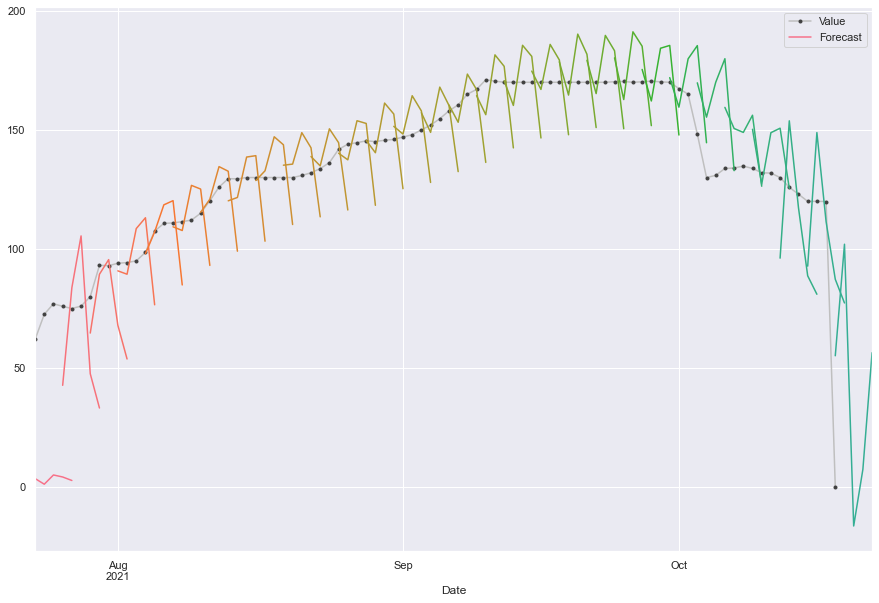

In [35]:
def plot_stepped_predictions(model, X_val, y_val, prediction_step = 3):
    pred = pd.DataFrame(
        model.predict(X_val),
        index = y_val.index, columns = y_val.columns
    )
    palette = dict(palette='husl', n_colors=64)
    ax2 = y_val['y_step_1'].plot(**plot_params)
    ax2 = plot_multistep(pred, ax=ax2, palette_kwargs=palette, every=prediction_step)
    _ = ax2.legend(['Value', 'Forecast'])

    plt.show()

plot_stepped_predictions(model, X_val, y_val, prediction_step = 3)

# More nodes

In [36]:
model = keras.Sequential(
    [
        	layers.Dense(200, input_dim=n_features, kernel_initializer='he_uniform', activation='relu'),
            layers.Dense(100, kernel_initializer='he_uniform', activation='relu'),
	        layers.Dense(n_output, kernel_initializer='he_uniform')
    ]
)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 200)               3400      
_________________________________________________________________
dense_12 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 505       
Total params: 24,005
Trainable params: 24,005
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train, y_train, batch_size = batch_size)
evaluate(model, X_train, y_train)
evaluate(model, X_val, y_val)

Train on 1719 samples
1719/1719 [==============================] - 1s 529us/sample - loss: 1106.1991
Result - MSE:  206.07544173868268  - MAPE:  0.1285309895954809
Result - MSE:  544.8425907674072  - MAPE:  1.4895434302217323


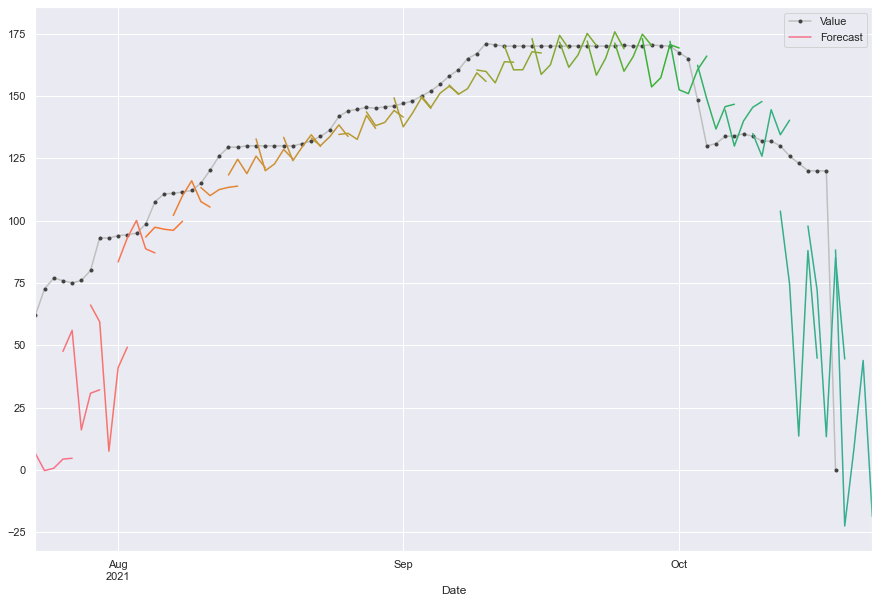

In [40]:
plot_stepped_predictions(model, X_val, y_val)